In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])
sa_postcodes_df = pd.read_csv(sa_postcodes)

In [2]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [3]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [4]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [5]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [6]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [7]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [8]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [9]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [10]:
#review updated dataframe
crime_postcode_merge_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0


In [11]:
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4','state'])

In [12]:
crime_data_2019_2020 = crime_postcode_merge_df[["Reported Date", "Suburb - Incident", "Postcode - Incident", "Offence Level 1 Description",
                                               "Offence count", "long", "lat", "dc", "sa3name"]].copy()

crime_data_2019_2020.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,1.0,138.603897,-35.061705,SOMERTON PARK DC,Onkaparinga
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,5.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City


In [13]:
# Extract month and year
crime_data_2019_2020['Year'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).year
crime_data_2019_2020['Month'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).month

#Drop 2018 data 
crime_data_2019_2020 = crime_data_2019_2020[crime_data_2019_2020.Year != 2018]

crime_data_2019_2020.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1


In [14]:
#Create 2019 crime dataframe
crime_data_2019_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2020]

crime_data_2019_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1


In [15]:
#Create 2020 crime dataframe
crime_data_2020_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2019]

crime_data_2020_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month
143821,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143822,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143823,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143824,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143825,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1


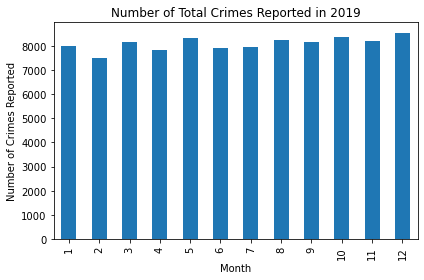

In [16]:
crime_2019 = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].count()

crime_2019.plot(kind="bar", title="Number of Total Crimes Reported in 2019")
plt.ylabel("Number of Crimes Reported")
plt.tight_layout()
plt.show()

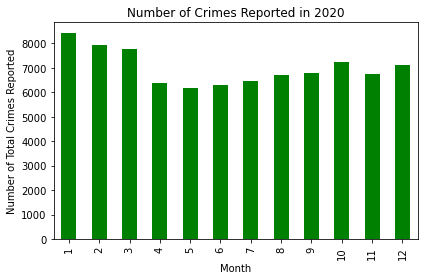

In [17]:
crime_2020 = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].count()

crime_2020.plot(kind="bar", title="Number of Crimes Reported in 2020", color="green")
plt.ylabel("Number of Total Crimes Reported")
plt.tight_layout()
plt.show()

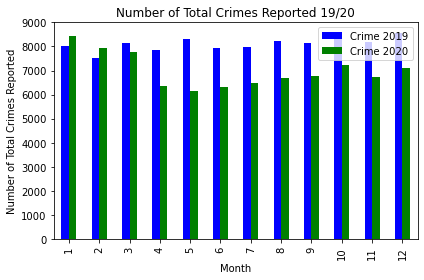

In [18]:
combined_crime = pd.DataFrame ({
    "Crime 2019" : crime_2019,
    "Crime 2020" : crime_2020
})

combined_crime.plot(kind="bar", color=["blue", "green"])
plt.title("Number of Total Crimes Reported 19/20")
plt.xlabel("Month")
plt.ylabel("Number of Total Crimes Reported")
plt.tight_layout()
plt.ylim(0, 9000)
plt.show()

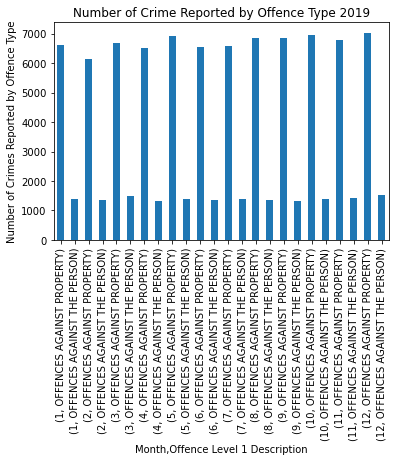

In [19]:
crime_2019_category = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2019_category.plot(kind="bar", title="Number of Crime Reported by Offence Type 2019")
plt.ylabel("Number of Crimes Reported by Offence Type")
plt.show()

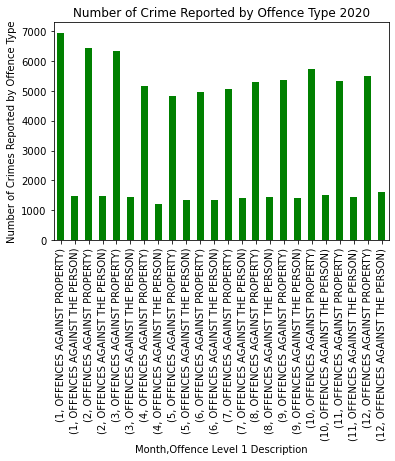

In [20]:
crime_2020_category = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2020_category.plot(kind="bar", title="Number of Crime Reported by Offence Type 2020", color="green")
plt.ylabel("Number of Crimes Reported by Offence Type")
plt.show()

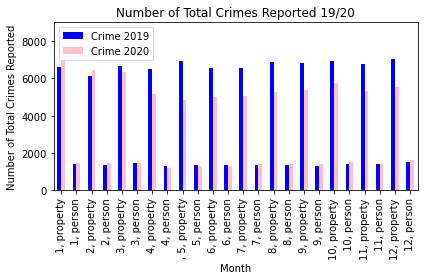

In [21]:
combined_crime_category = pd.DataFrame ({
    "Crime 2019" : crime_2019_category,
    "Crime 2020" : crime_2020_category
})

combined_crime_category.plot(kind="bar", color=["blue", "pink"])
plt.title("Number of Total Crimes Reported 19/20")
plt.xlabel("Month")

tickvalues = range(0,24)
plt.xticks(ticks=tickvalues, labels=["1, property", "1, person", "2, property", "2, person", "3, property", "3, person", 
                                     "4, property", "4, person", ", 5, property", "5, person", "6, property", "6, person", 
                                    "7, property", "7, person", "8, property", "8, person", "9, property", "9, person", 
                                     "10, property", "10, person", "11, property", "11, person", "12, property", "12, person"], rotation=90)

plt.ylabel("Number of Total Crimes Reported")
plt.ylim(0, 9000)
plt.tight_layout()
plt.show()

In [22]:
# convert to datetime

crime_data_2019_df['Reported Date'] = pd.to_datetime(crime_data_2019_df['Reported Date'], format='%Y%m%d')
crime_data_2020_df['Reported Date'] = pd.to_datetime(crime_data_2020_df['Reported Date'], format='%Y%m%d')


/Users/teals.1tb/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/teals.1tb/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
# pre lockdown 14 - 17, lockdown 18 - 21, post lockdown 22 - 25

lockdown_2019_df = crime_data_2019_df.loc[(crime_data_2019_df["Reported Date"] >= "2019-11-14") & (crime_data_2019_df["Reported Date"] <= "2019-11-25")]
lockdown_2020_df = crime_data_2020_df.loc[(crime_data_2020_df["Reported Date"] >= "2020-11-14") & (crime_data_2020_df["Reported Date"] <= "2020-11-25")]

lockdown_2019_df['Day'] = pd.DatetimeIndex(lockdown_2019_df['Reported Date']).day
lockdown_2020_df['Day'] = pd.DatetimeIndex(lockdown_2020_df['Reported Date']).day


# lockdown_2019_df['Reported Date'] = pd.to_datetime(lockdown_2019_df['Reported Date'], format='%Y%m%d')
# lockdown_2020_df['Reported Date'] = pd.to_datetime(lockdown_2020_df['Reported Date'], format='%Y%m%d')

lockdown_2019_sum = lockdown_2019_df.groupby("Day")["Offence count"].sum()
lockdown_2020_sum = lockdown_2020_df.groupby("Day")["Offence count"].sum()

/Users/teals.1tb/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/teals.1tb/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
lockdown_2020_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month,Day
217093,2020-11-14,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,11,14
217094,2020-11-14,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,11,14
217095,2020-11-14,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,11,14
217096,2020-11-14,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,11,14
217097,2020-11-14,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...
219585,2020-11-25,WILLASTON,5118,OFFENCES AGAINST PROPERTY,1.0,138.705675,-34.583780,GAWLER DC,Playford,2020,11,25
219586,2020-11-25,WINDSOR GARDENS,5087,OFFENCES AGAINST PROPERTY,2.0,138.637707,-34.876988,GLYNDE DC,Port Adelaide - East,2020,11,25
219587,2020-11-25,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,1.0,138.527677,-34.883282,REGENCY PARK DC,Charles Sturt,2020,11,25
219588,2020-11-25,WOODVILLE NORTH,5012,OFFENCES AGAINST PROPERTY,1.0,138.541637,-34.863030,REGENCY PARK DC,Port Adelaide - West,2020,11,25


In [33]:
lockdown_2020_sum

Day
14    244.0
15    276.0
16    283.0
17    254.0
18    274.0
19    188.0
20    178.0
21    175.0
22    199.0
23    320.0
24    267.0
25    289.0
Name: Offence count, dtype: float64

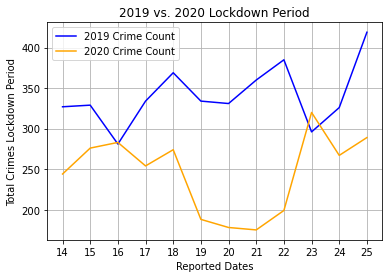

In [62]:
lockdown_2019_sum.plot(x="Day", y = "Offence Count", color="blue", label ="2019 Crime Count")
lockdown_2020_sum.plot(x="Day", y = "Offence Count", color="orange", label = "2020 Crime Count")
# tickvalues = range(0,12)
# plt.xticks(ticks=tickvalues, labels=["14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"], rotation=360)

plt.xticks(np.arange(14, 26, 1))

plt.ylabel("Total Crimes Lockdown Period")
plt.xlabel("Reported Dates")
plt.title("2019 vs. 2020 Lockdown Period")
plt.grid(True)
plt.legend()
plt.show()



In [74]:
pct_change = lockdown_2020_sum / lockdown_2019_sum
nmbr_crime = lockdown_2020_sum - lockdown_2019_sum

lockdown_summary = pd.DataFrame ({
"2019": lockdown_2019_sum,
"2020": lockdown_2020_sum,
"Percentage Change": pct_change, 
"No. Crime": nmbr_crime})

lockdown_summary["Percentage Change"] = lockdown_summary["Percentage Change"].map("{:.2%}".format)


lockdown_summary

,2019,2020,Percentage Change,No. Crime
Day,,,,
14,327.0,244.0,74.62%,-83.0
15,329.0,276.0,83.89%,-53.0
16,281.0,283.0,100.71%,2.0
17,334.0,254.0,76.05%,-80.0
18,369.0,274.0,74.25%,-95.0
19,334.0,188.0,56.29%,-146.0
20,331.0,178.0,53.78%,-153.0
21,360.0,175.0,48.61%,-185.0
22,385.0,199.0,51.69%,-186.0
